
##Lasso Regression:

Y = wX + b

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

###Gradient Descent:

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

###Learning Rate:

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

###Gradient for Weights

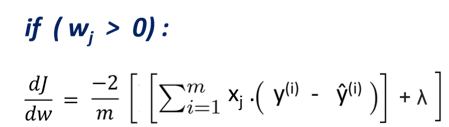

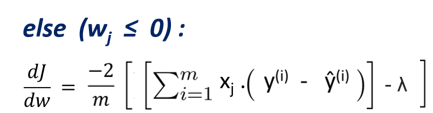

###Gradient for Bias

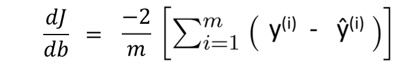

#Import Necessary Libraries

In [286]:
import numpy as np # numpy used for mathematical operation on array
import pandas as pd  # pandas used for data manipulation on dataframe
import matplotlib.pyplot as plt # matplotlib used for data visualization
import seaborn as sns # seaborn used for data visualization
import random
from sklearn.preprocessing import StandardScaler

#Reading Dataset

In [287]:
# Read the data with pandas

df= pd.read_csv("/content/Salary_Data.csv")

In [288]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [289]:
# Reading last 5 Rows of the data

df.tail()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
62637,9/9/2018 11:52:32,Google,T4,Software Engineer,327000,"Seattle, WA",10.0,1.0,Distributed Systems (Back-End),155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62638,9/13/2018 8:23:32,Microsoft,62,Software Engineer,237000,"Redmond, WA",2.0,2.0,Full Stack,146900.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62639,9/13/2018 14:35:59,MSFT,63,Software Engineer,220000,"Seattle, WA",14.0,12.0,Full Stack,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62640,9/16/2018 16:10:35,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8.0,4.0,iOS,194688.0,...,0,0,0,0,0,0,0,0,NaN,NaN
62641,1/29/2019 5:12:59,apple,ict3,Software Engineer,200000,"Sunnyvale, CA",0.0,0.0,ML / AI,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [290]:
# Checking the shape of the data

df.shape

(62642, 29)

In [291]:
# Checking the rows of the data

df.shape[0]

62642

In [292]:
# Checking the column of the data

df.shape[1]

29

In [293]:
# Checking the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [294]:
# Checking the summary statistics of the dataset

df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000,62642.000000,62640.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588,9856.201989,616.097222,41694.723732,0.245698,0.201223,0.028783,0.005108,0.005667,0.187925,0.128221,0.012835,0.011015,0.018039
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040,6679.104563,289.843390,24488.865879,0.430504,0.400917,0.167196,0.071291,0.075067,0.390655,0.334338,0.112562,0.104373,0.133094
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000,7369.000000,506.000000,20069.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000,7839.000000,807.000000,42019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000,11521.000000,807.000000,63021.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000,47926.000000,881.000000,83875.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [295]:
# Checking the null values of the data

df.isnull()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
62638,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
62639,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
62640,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


In [296]:
# We can see the data types of each column in a tabular format.

Data_dict = pd.DataFrame(df.dtypes)
Data_dict

,0
timestamp,object
company,object
level,object
title,object
totalyearlycompensation,int64
location,object
yearsofexperience,float64
yearsatcompany,float64
tag,object
basesalary,float64


In [297]:
# identifying the missing values of each column in a tabular format.

Data_dict['MissingVal'] = df.isnull().sum()
Data_dict

,0,MissingVal
timestamp,object,0
company,object,5
level,object,119
title,object,0
totalyearlycompensation,int64,0
location,object,0
yearsofexperience,float64,0
yearsatcompany,float64,0
tag,object,854
basesalary,float64,0


In [298]:
# identifying the unique values of each column in a tabular format.

Data_dict['UniqueVal'] = df.nunique()
Data_dict

,0,MissingVal,UniqueVal
timestamp,object,0,62561
company,object,5,1631
level,object,119,2923
title,object,0,15
totalyearlycompensation,int64,0,893
location,object,0,1050
yearsofexperience,float64,0,65
yearsatcompany,float64,0,81
tag,object,854,3058
basesalary,float64,0,482


In [299]:
# identifying count of the variable.

Data_dict['Count'] = df.count()
Data_dict

,0,MissingVal,UniqueVal,Count
timestamp,object,0,62561,62642
company,object,5,1631,62637
level,object,119,2923,62523
title,object,0,15,62642
totalyearlycompensation,int64,0,893,62642
location,object,0,1050,62642
yearsofexperience,float64,0,65,62642
yearsatcompany,float64,0,81,62642
tag,object,854,3058,61788
basesalary,float64,0,482,62642


In [300]:
# Checking the sum of null values of the data

df.isnull().sum()

timestamp                      0
company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22505
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
dtype: int64

In [301]:
# Impute "categorical null values" with Mode value

df['company'].fillna(df['company'].mode()[0], inplace=True)
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['Education'].fillna(df['Education'].mode()[0], inplace=True)
df['Race'].fillna(df['Race'].mode()[0], inplace=True)
df['otherdetails'].fillna(df['otherdetails'].mode()[0], inplace=True)
df['tag'].fillna(df['tag'].mode()[0], inplace=True)
df['level'].fillna(df['level'].mode()[0], inplace=True)
df['dmaid'].fillna(df['dmaid'].median(), inplace=True)

In [302]:
# Checking the sum of null values of the updated data

df.isnull().sum()

timestamp                  0
company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
tag                        0
basesalary                 0
stockgrantvalue            0
bonus                      0
gender                     0
otherdetails               0
cityid                     0
dmaid                      0
rowNumber                  0
Masters_Degree             0
Bachelors_Degree           0
Doctorate_Degree           0
Highschool                 0
Some_College               0
Race_Asian                 0
Race_White                 0
Race_Two_Or_More           0
Race_Black                 0
Race_Hispanic              0
Race                       0
Education                  0
dtype: int64

###Data Visualization

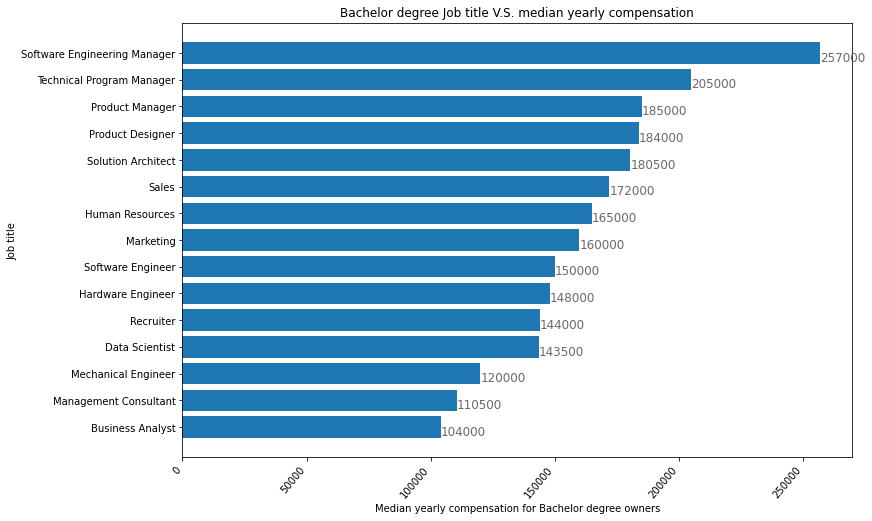

In [303]:
# Data visualization

# Let's see the average annual compensation of workers by job title


df1 = df[df["Education"] == "Bachelor's Degree"]
df2 = df1[["title", "totalyearlycompensation"]].groupby(["title"]).median().round(2).sort_values("totalyearlycompensation", ascending=True)

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(df2.index, df2.totalyearlycompensation)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=50, horizontalalignment="right")
ax.set(title="Bachelor degree Job title V.S. median yearly compensation",
       xlabel="Median yearly compensation for Bachelor degree owners",
       ylabel="Job title")

# add labels showing the count of workers and value counts for each job title
for i in ax.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.1, \
            str(int(i.get_width())), fontsize=12, color='dimgrey')

plt.show()



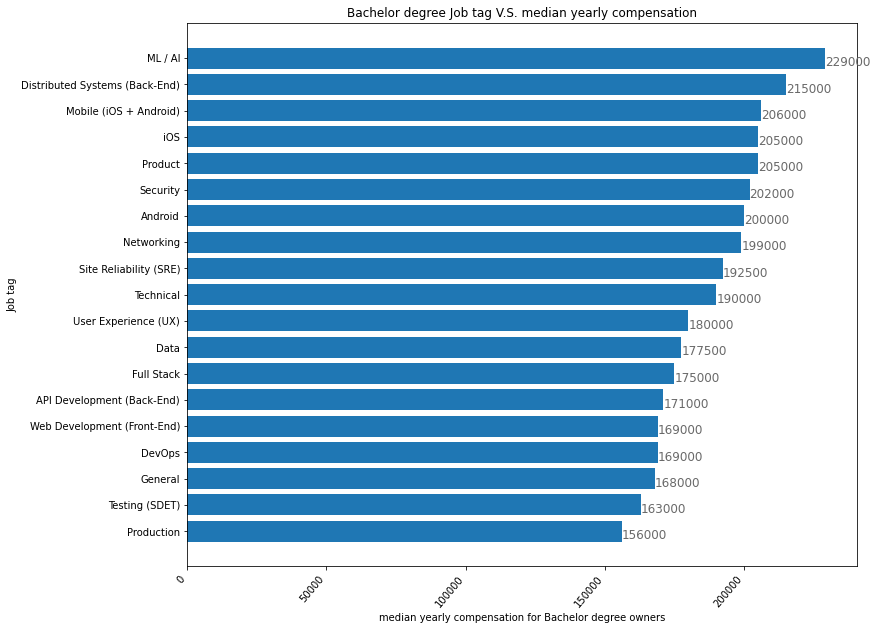

In [304]:
# Same as above but refered to tag

dataset_count = df[["tag", "totalyearlycompensation"]].groupby(["tag"]).count().round(2)
dataset_val = df[["tag", "totalyearlycompensation"]].groupby(["tag"]).median().round(2)
dataset = dataset_val[dataset_count["totalyearlycompensation"] >= 500].sort_values("totalyearlycompensation", ascending = True)  # The tag must occure at least 500 times


fig, ax = plt.subplots(figsize=(12, 10))
ax.barh(dataset.index, dataset.totalyearlycompensation)
labels = ax.get_xticklabels()
plt.setp(labels, rotation = 50, horizontalalignment="right")
ax.set(title = "Bachelor degree Job tag V.S. median yearly compensation", xlabel = "median yearly compensation for Bachelor degree owners", ylabel = "Job tag")

# add labels showing the count of workers for each job title
for i in ax.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.1, \
            str(int(i.get_width())), fontsize=12, color='dimgrey')

plt.show();


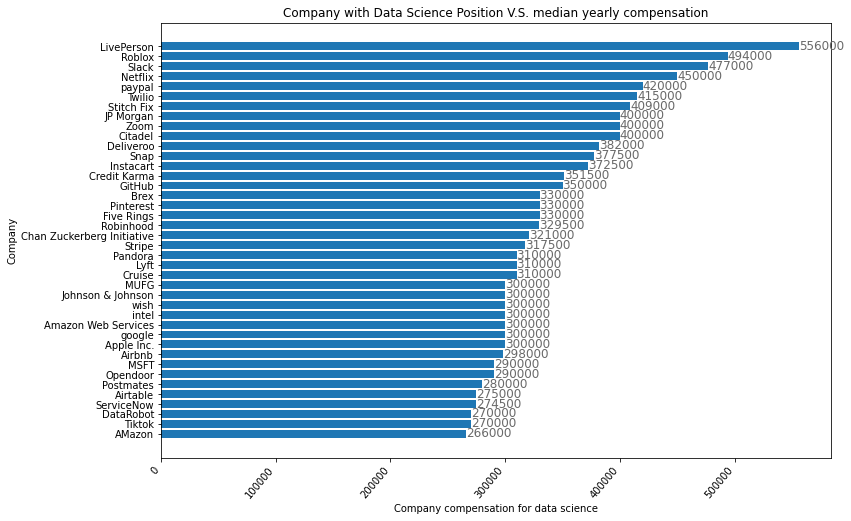

In [305]:
import matplotlib.pyplot as plt

# Filter the dataset for Data Scientist positions
DS_salaries = df[df["title"] == "Data Scientist"] 

# Compute the median yearly compensation for each company
dataset_DS = DS_salaries[["company", "totalyearlycompensation"]].groupby(["company"]).median().round(2).sort_values("totalyearlycompensation", ascending = True).tail(40)

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(dataset_DS.index, dataset_DS.totalyearlycompensation)

# Set the x-axis labels
labels = ax.get_xticklabels()
plt.setp(labels, rotation = 50, horizontalalignment="right")

# Set the plot title and axis labels
ax.set(title = "Company with Data Science Position V.S. median yearly compensation", xlabel = "Company compensation for data science", ylabel = "Company")

# Add labels showing the count of positions for each company
for i in ax.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.1, \
            str(int(i.get_width())), fontsize=12, color='dimgrey')

plt.show();


None adjusted:

LivePerson have the highest compensation which is around 600K

Second place is Roblox, and then is Slack, Netflix.



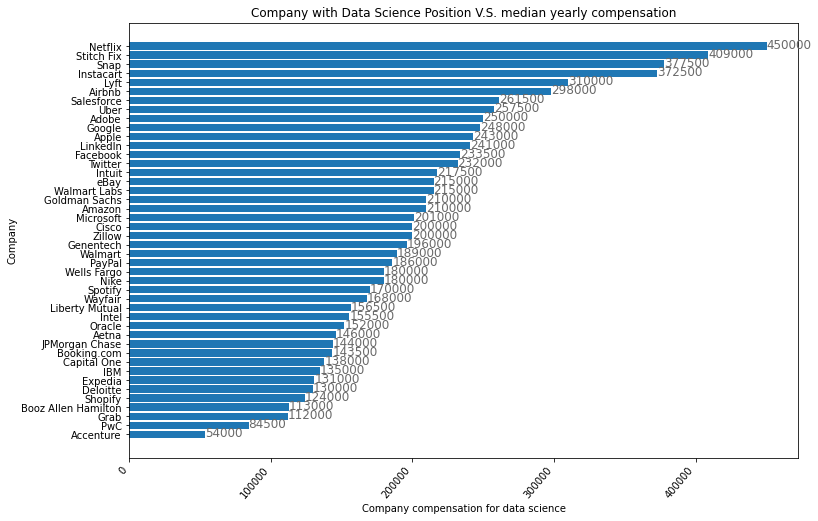

In [306]:
# Maximum

# Adjustment Data science job
data_sal = df[df["title"] == "Data Scientist"]
dataset_count = data_sal[["company", "totalyearlycompensation"]].groupby(["company"]).count().round(2)
dataset_val = data_sal[["company", "totalyearlycompensation"]].groupby(["company"]).median().round(2)
dataset_DS = dataset_val[dataset_count["totalyearlycompensation"] >= 10].sort_values("totalyearlycompensation", ascending = True)  # The tag must occure at least 500 times

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(dataset_DS.index, dataset_DS.totalyearlycompensation)
labels = ax.get_xticklabels()
plt.setp(labels, rotation = 50, horizontalalignment="right")
ax.set(title = "Company with Data Science Position V.S. median yearly compensation", xlabel = "Company compensation for data science", ylabel = "Company")
for i in ax.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.1, \
            str(int(i.get_width())), fontsize=12, color='dimgrey')

plt.show();



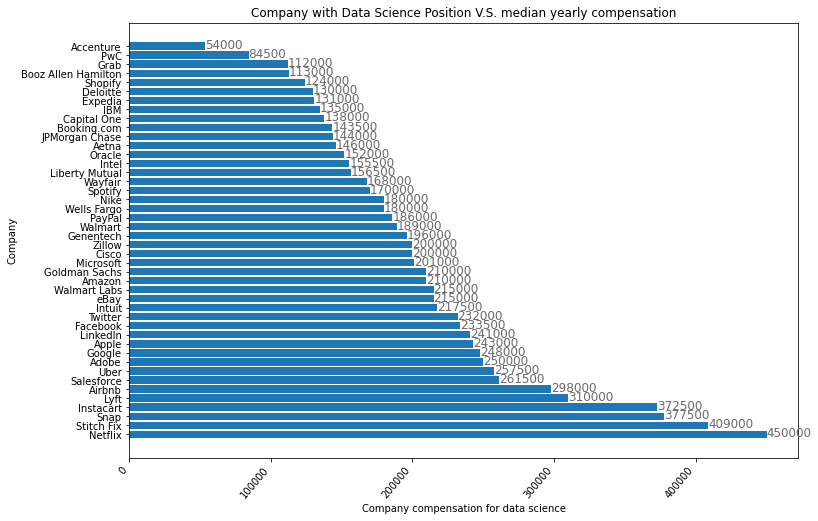

In [307]:
# Minimum

# Adjustment Data science job
data_sal = df[df["title"] == "Data Scientist"]
dataset_count = data_sal[["company", "totalyearlycompensation"]].groupby(["company"]).count().round(2)
dataset_val = data_sal[["company", "totalyearlycompensation"]].groupby(["company"]).median().round(2)
dataset_DS = dataset_val[dataset_count["totalyearlycompensation"] >= 10].sort_values("totalyearlycompensation", ascending = False)  # The tag must occure at least 500 times

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(dataset_DS.index, dataset_DS.totalyearlycompensation)
labels = ax.get_xticklabels()
plt.setp(labels, rotation = 50, horizontalalignment="right")
ax.set(title = "Company with Data Science Position V.S. median yearly compensation", xlabel = "Company compensation for data science", ylabel = "Company")
for i in ax.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.1, \
            str(int(i.get_width())), fontsize=12, color='dimgrey')

plt.show();


Adjusted:

Only company that have at least 10 employees in the database will count this would exclude company with small amount of data science with high pay.

Netflix have the highest median compensation for data scientists.

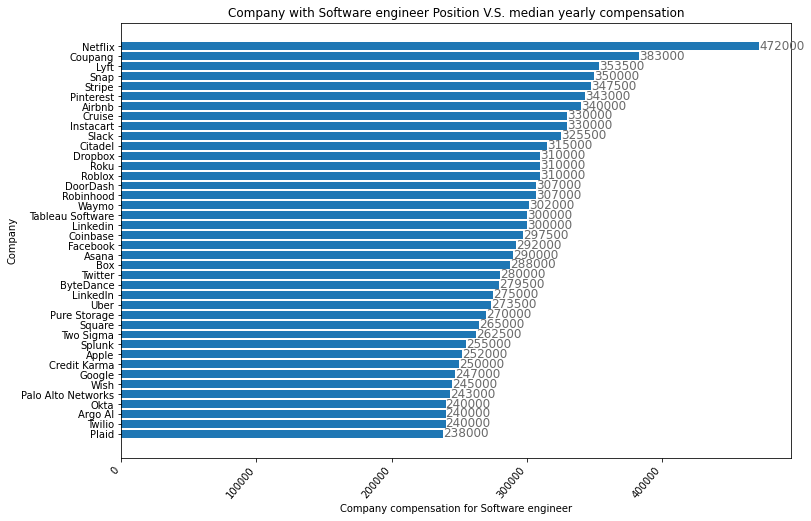

In [308]:
# Software Engineer and totalyearlycompensation

# Maximum

data_sal = df[df["title"] == "Software Engineer"]
dataset_count = data_sal[["company", "totalyearlycompensation"]].groupby(["company"]).count().round(2)
dataset_val = data_sal[["company", "totalyearlycompensation"]].groupby(["company"]).median().round(2)
dataset_SW = dataset_val[dataset_count["totalyearlycompensation"] >= 20].sort_values("totalyearlycompensation", ascending = True).tail(40)  # The tag must occure at least 500 times

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(dataset_SW.index, dataset_SW.totalyearlycompensation)
labels = ax.get_xticklabels()
plt.setp(labels, rotation = 50, horizontalalignment="right")
ax.set(title = "Company with Software engineer Position V.S. median yearly compensation", xlabel = "Company compensation for Software engineer", ylabel = "Company")
for i in ax.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.1, \
            str(int(i.get_width())), fontsize=12, color='dimgrey')

plt.show();


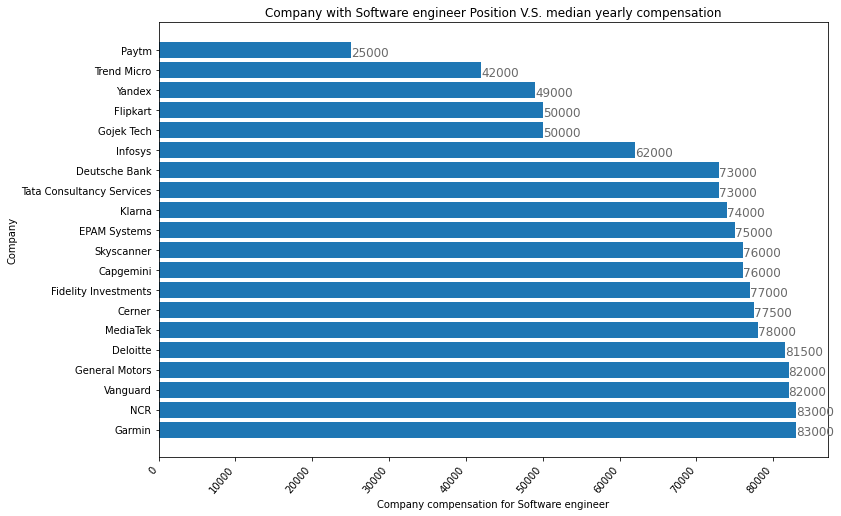

In [309]:
# Software Engineer and totalyearlycompensation

# Minimum

data_sal = df[df["title"] == "Software Engineer"]
dataset_count = data_sal[["company", "totalyearlycompensation"]].groupby(["company"]).count().round(2)
dataset_val = data_sal[["company", "totalyearlycompensation"]].groupby(["company"]).median().round(2)
dataset_SW = dataset_val[dataset_count["totalyearlycompensation"] >= 20].sort_values("totalyearlycompensation", ascending = False).tail(20)  # The tag must occure at least 500 times

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(dataset_SW.index, dataset_SW.totalyearlycompensation)
labels = ax.get_xticklabels()
plt.setp(labels, rotation = 50, horizontalalignment="right")
ax.set(title = "Company with Software engineer Position V.S. median yearly compensation", xlabel = "Company compensation for Software engineer", ylabel = "Company")
for i in ax.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.1, \
            str(int(i.get_width())), fontsize=12, color='dimgrey')

plt.show();


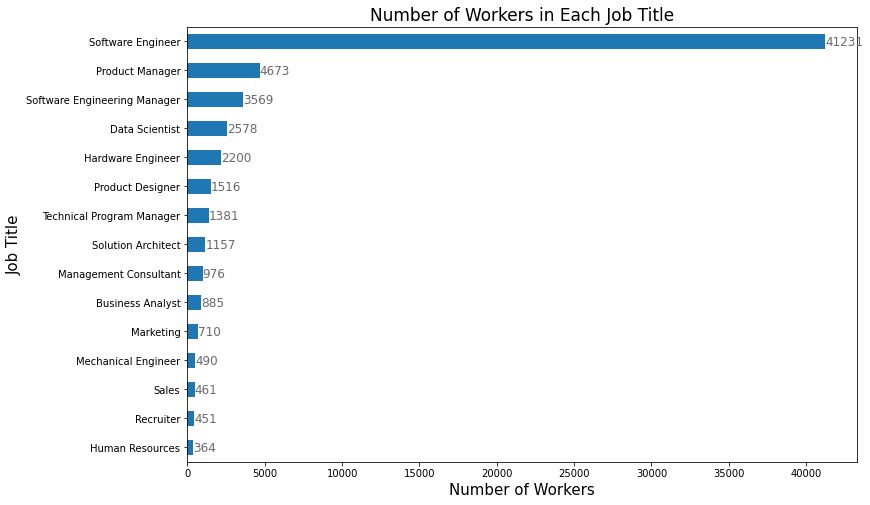

In [310]:
#Let's see the number of workers in each job title

import matplotlib.pyplot as plt

top_jobs = df['title'].value_counts(ascending = True)
fig, ax = plt.subplots(figsize = (12,8))
top_jobs.plot.barh(ax=ax)
plt.title("Number of Workers in Each Job Title", size=17)
plt.xlabel('Number of Workers', size = 15)
plt.ylabel('Job Title', size = 15)

# add labels showing the count of workers for each job title
for i in ax.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.1, \
            str(round((i.get_width()), 2)), fontsize=12, color='dimgrey')

plt.show();

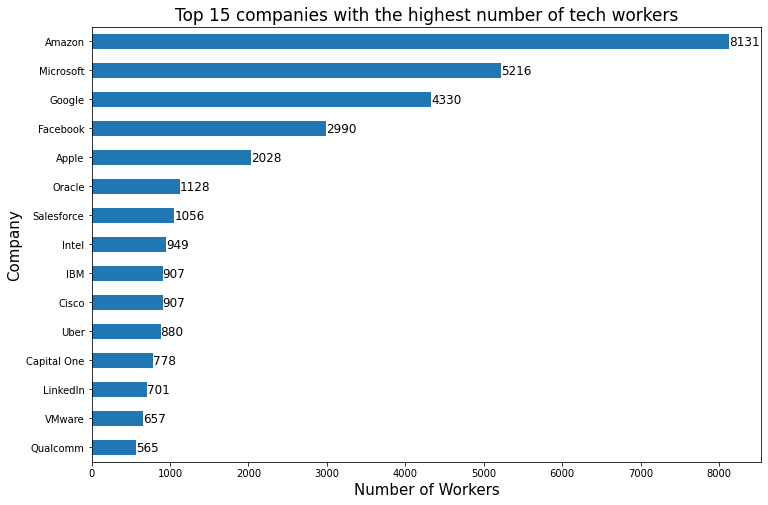

In [311]:
#Let's see the top 10 companies with the highest number of tech workers

companies_with_most_tech_workers = df['company'].value_counts(ascending = False).head(15).sort_values(ascending = True).plot.barh(figsize = (12,8));
plt.title('Top 15 companies with the highest number of tech workers', size=17)
plt.xlabel('Number of Workers', size = 15)
plt.ylabel('Company', size = 15)

# add labels showing the count of workers for each company
for i in companies_with_most_tech_workers.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.1, \
            str(round((i.get_width()), 2)), fontsize=12, color='black')

plt.show();

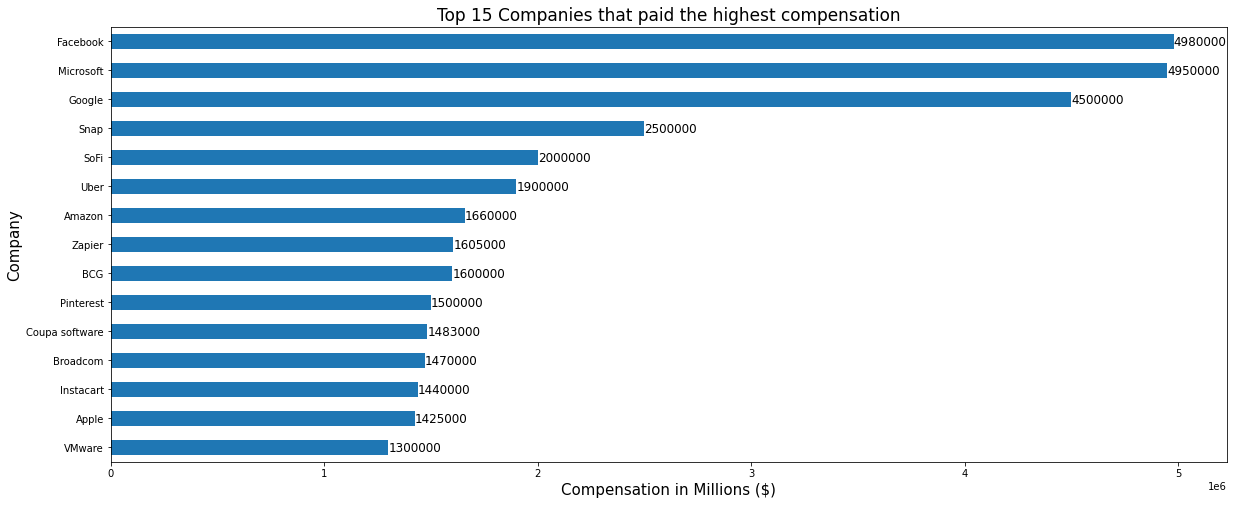

In [312]:
# Let's see the top 10 companies that paid the highest salaries.

highest_paying_companies = df[['company','title','totalyearlycompensation']].groupby(['company'])\
                                                                                       .max()\
                                                                                       .sort_values('totalyearlycompensation',ascending = False)\
                                                                                       .head(15)\
                                                                                       .sort_values('totalyearlycompensation', ascending = True)\
                                                                                       .plot.barh(figsize = (20,8), legend = False);


plt.title('Top 15 Companies that paid the highest compensation', size=17)
plt.xlabel('Compensation in Millions ($)', size = 15)
plt.ylabel('Company', size = 15)
for i in highest_paying_companies.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.1, \
            str(round((i.get_width()), 2)), fontsize=12, color='black')
plt.show();

In [313]:
df['gender'].unique()

array(['Male', 'Female', 'Other', 'Title: Senior Software Engineer'],
      dtype=object)

In [314]:
unique_counts = df['gender'].value_counts()

print(unique_counts)

Male                               55242
Female                              6999
Other                                400
Title: Senior Software Engineer        1
Name: gender, dtype: int64


In [315]:
df = df.fillna({ 'gender':'Unknown'})
df['gender'].unique()

array(['Male', 'Female', 'Other', 'Title: Senior Software Engineer'],
      dtype=object)

In [316]:
# I cleaned up the gender column, 
# since there is no gender called Title: Senior Software Engineer. I replaced this gender with "Other"

df['gender'] = df['gender'].replace('Title: Senior Software Engineer', 'Other')
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

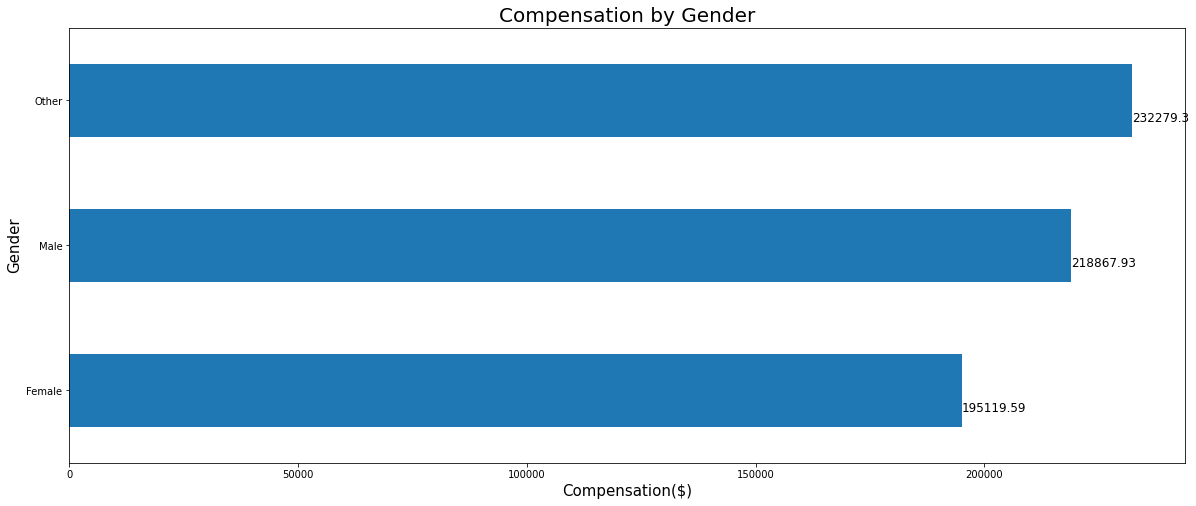

In [317]:
pay_by_gender = df[['totalyearlycompensation', 'gender']].groupby(['gender']).mean().round(2)\
                                                                    .sort_values('totalyearlycompensation', ascending = False)\
                                                                    .head(10)\
                                                                    .sort_values('totalyearlycompensation', ascending = True)\
                                                                    .plot.barh(figsize = (20,8), legend = False);

plt.title('Compensation by Gender', size=20)
plt.xlabel('Compensation($)', size = 15)
plt.ylabel('Gender', size = 15)
for i in pay_by_gender.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.1, \
            str(round((i.get_width()), 2)), fontsize=12, color='black')
plt.show();

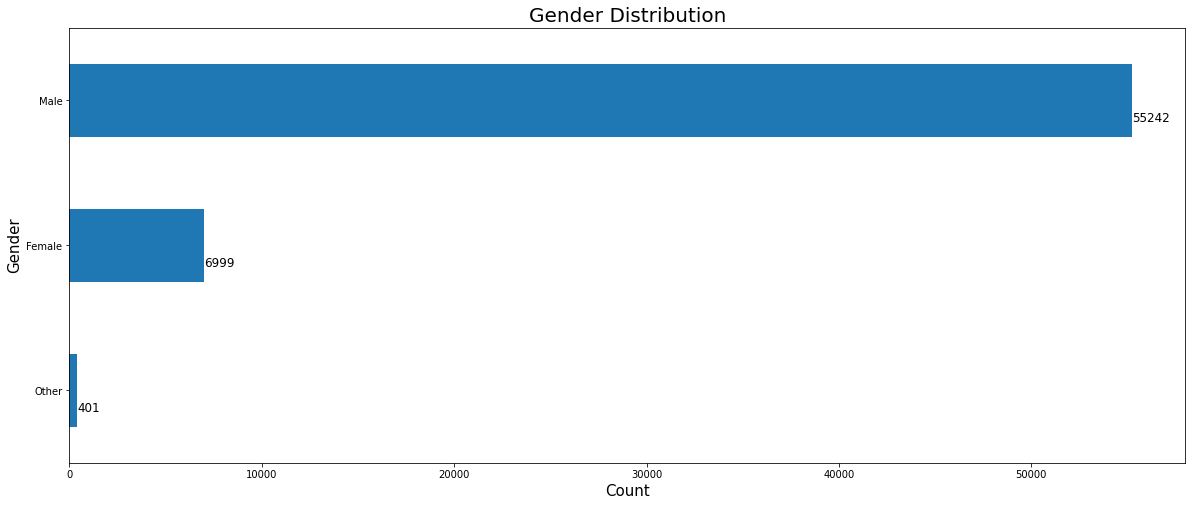

In [318]:
# Now, let's look at the gender distribution

gender_distribution = df['gender'].value_counts(ascending = True).plot.barh(figsize = (20,8));
plt.title('Gender Distribution', size=20)
plt.xlabel('Count', size = 15)
plt.ylabel('Gender', size = 15)
for i in gender_distribution.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.1, \
            str(round((i.get_width()), 2)), fontsize=12, color='black')
plt.show();

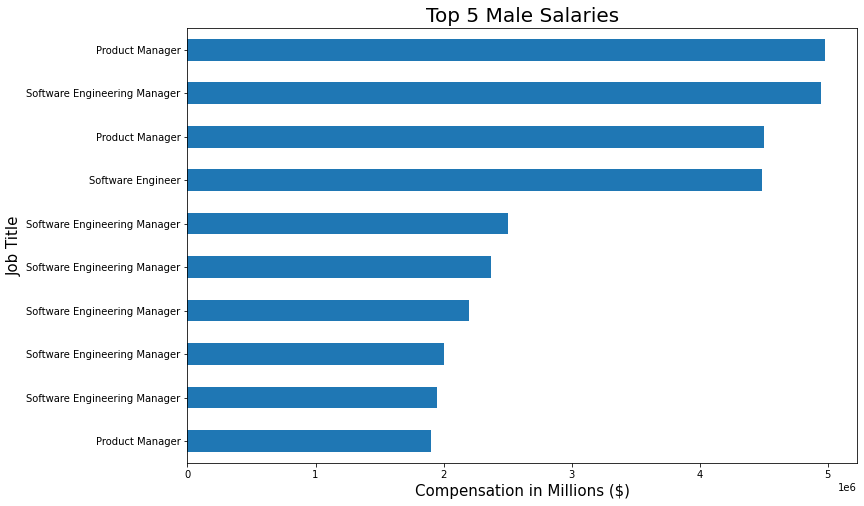

In [319]:
# Let's dig a little deeper and look at the top 5 salaries for males

male_salaries = df[df.gender == 'Male'].copy()
top4_male_salaries = male_salaries.nlargest(10,'totalyearlycompensation').sort_values('totalyearlycompensation', ascending = True)
top4_male_salaries.plot.barh(x = 'title', y = 'totalyearlycompensation', figsize = (12,8), legend = False);
plt.title('Top 5 Male Salaries', size=20)
plt.xlabel('Compensation in Millions ($)', size = 15)
plt.ylabel('Job Title', size = 15)
plt.show();

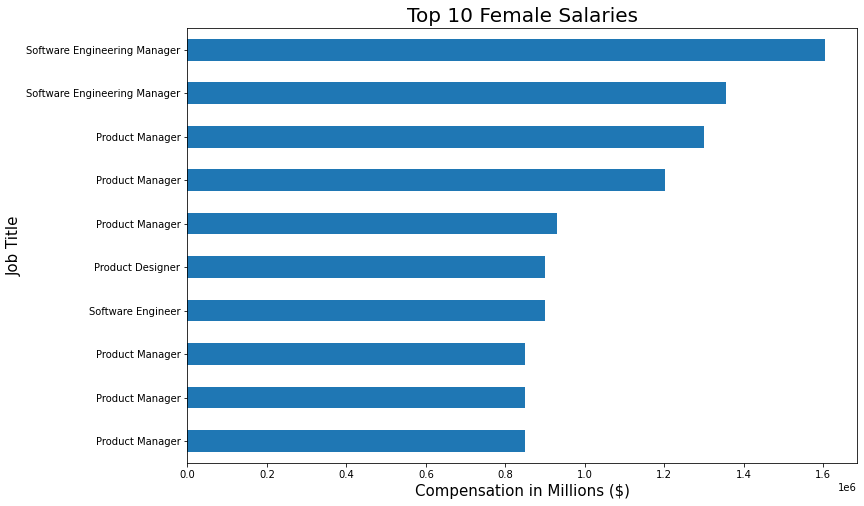

In [320]:
# Now, let's see the top 5 female salaries

female_salaries = df[df.gender == 'Female'].copy()
top4_female_salaries = female_salaries.nlargest(10,'totalyearlycompensation').sort_values('totalyearlycompensation', ascending = True)
top4_female_salaries.plot.barh(x = 'title', y = 'totalyearlycompensation', figsize = (12,8), legend = False);
plt.title('Top 10 Female Salaries', size=20)
plt.xlabel('Compensation in Millions ($)', size = 15)
plt.ylabel('Job Title', size = 15)

plt.show();

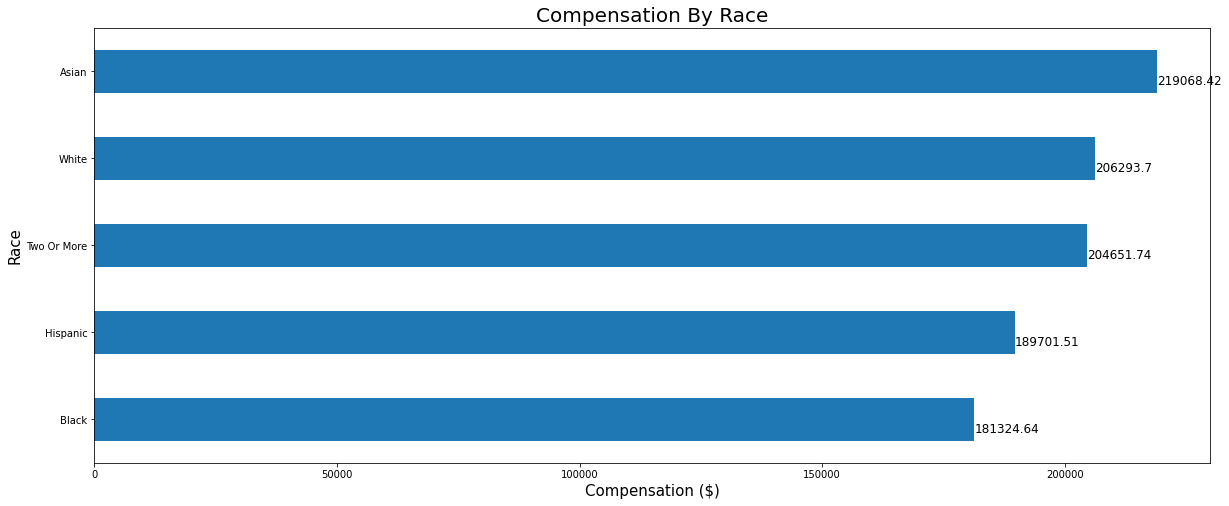

In [321]:
# Let's see the compensation by race

pay_by_race = df[['totalyearlycompensation','Race']].groupby(['Race'])\
                                                               .mean()\
                                                               .round(2)\
                                                               .sort_values('totalyearlycompensation', ascending = True)\
                                                               .plot.barh(figsize = (20,8), legend = False)
plt.title('Compensation By Race', size=20)
plt.xlabel('Compensation ($)', size = 15)
plt.ylabel('Race', size = 15)
for i in pay_by_race.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.1, \
            str(round((i.get_width()), 2)), fontsize=12, color='black')
plt.show();

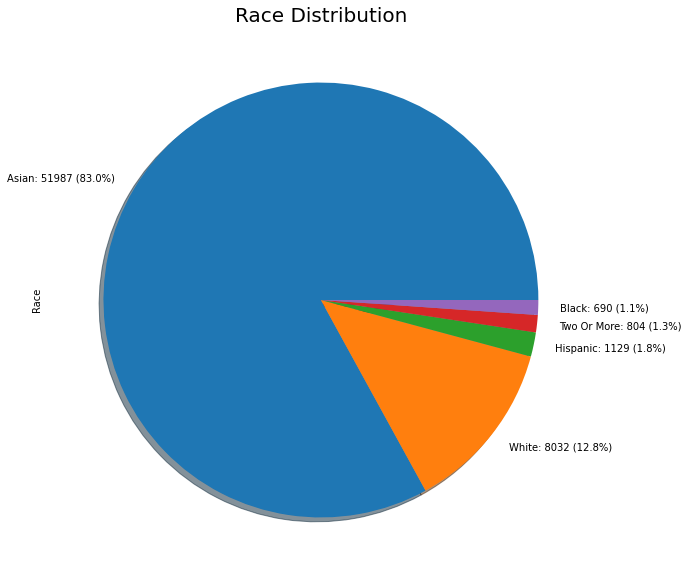

In [322]:
# Let's see the race distribution of the tech sector jobs

race_counts = df['Race'].value_counts()
race_percentages = race_counts / len(df) * 100

labels = [f"{race_counts.index[i]}: {race_counts[i]} ({race_percentages[i]:.1f}%)" for i in range(len(race_counts))]
race_distribution = race_counts.plot.pie(figsize = (12,10), labels=labels, radius=1, shadow=True, autopct='')
plt.title('Race Distribution', size=20)

plt.show();


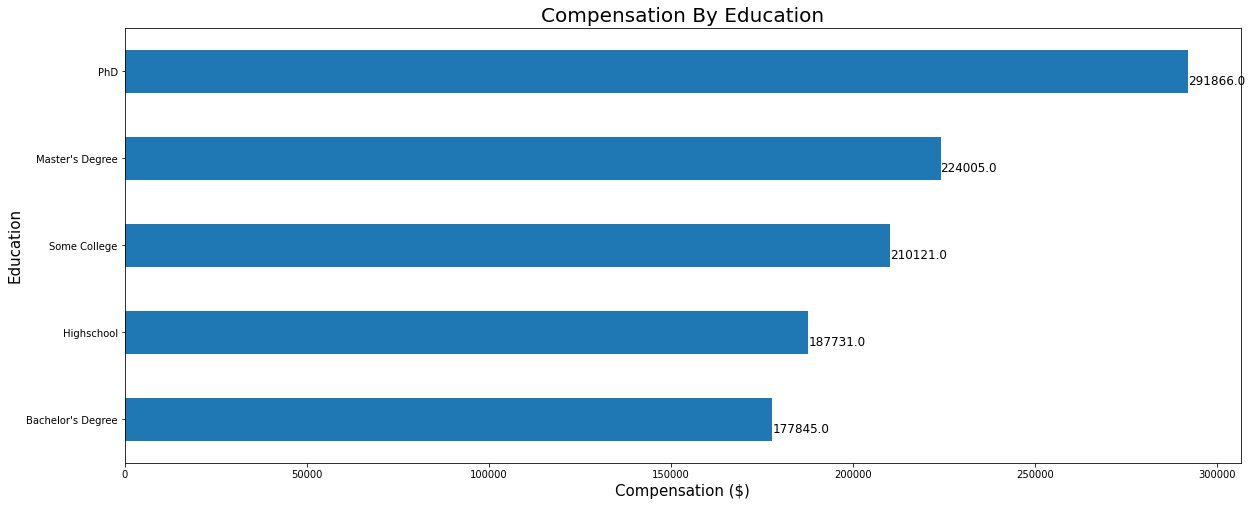

In [323]:
# Let's see the compensation by education

pay_by_education = df[['totalyearlycompensation','Education']].groupby(['Education'])\
                                                                         .mean().round()\
                                                                         .sort_values('totalyearlycompensation', ascending = True)\
                                                                         .plot.barh(figsize = (20,8), legend = False)
plt.title('Compensation By Education', size=20)
plt.xlabel('Compensation ($)', size = 15)
plt.ylabel('Education', size = 15)
for i in pay_by_education.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.1, \
            str(round((i.get_width()), 2)), fontsize=12, color='black')
plt.show();

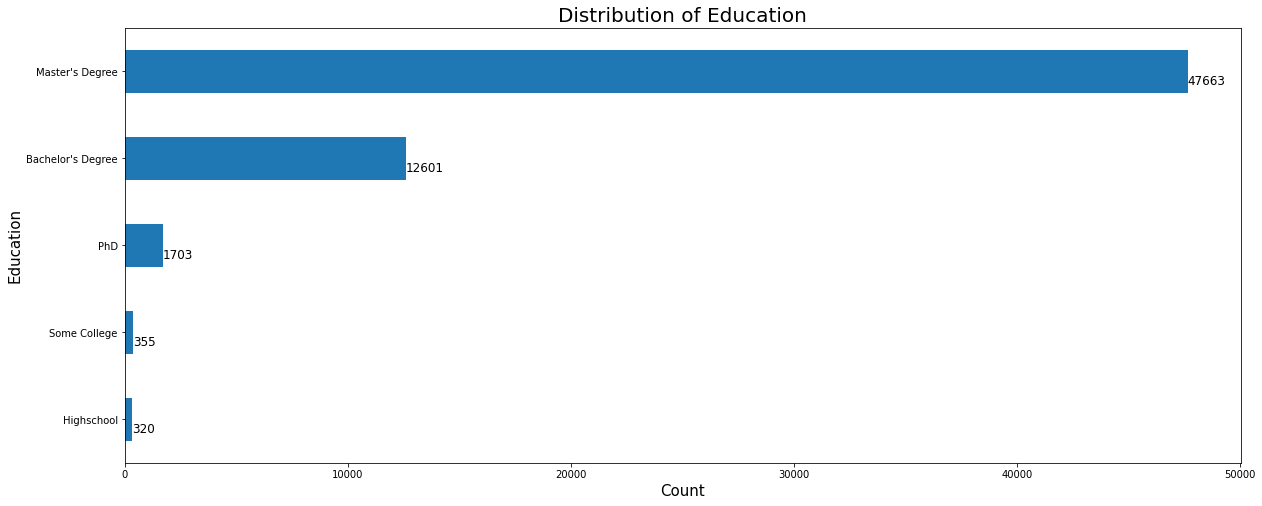

In [324]:
# Let's see the distribution of education

education_distribution = df['Education'].value_counts(ascending = True).plot.barh(figsize = (20,8))
plt.title('Distribution of Education', size=20)
plt.xlabel('Count', size = 15)
plt.ylabel('Education', size = 15)
for i in education_distribution.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.1, \
            str(round((i.get_width()), 2)), fontsize=12, color='black')
plt.show();

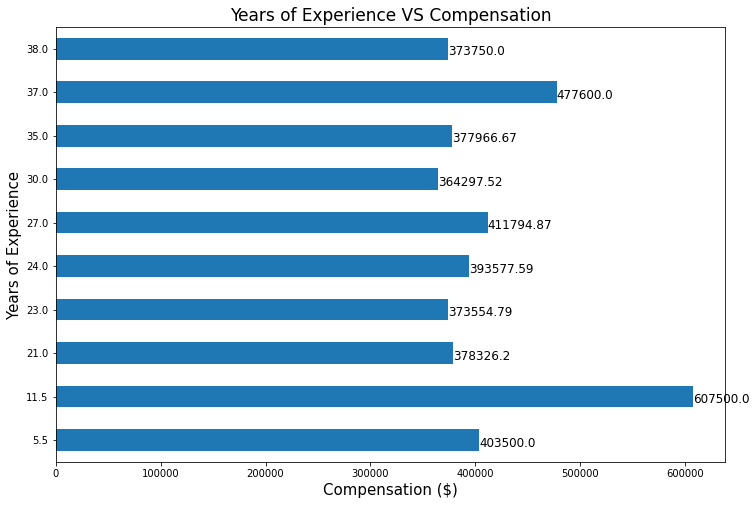

In [325]:
# Let's examine if there is a correlation between years of experience and compensation

# There is no correlation between years of experience and annual compensation.
# This shows that in most companies, compensation is merit-based. 

years_of_experience = df[['totalyearlycompensation','yearsofexperience']].groupby(['yearsofexperience'])\
                                                                                             .mean()\
                                                                                             .round(2)\
                                                                                             .sort_values('totalyearlycompensation', ascending = False)\
                                                                                             .head(10)\
                                                                                             .sort_values('yearsofexperience', ascending = True)\
                                                                                             .plot.barh(figsize = (12,8),legend = False )
plt.title('Years of Experience VS Compensation', size=17)
plt.xlabel('Compensation ($)', size = 15)
plt.ylabel('Years of Experience', size = 15)
for i in years_of_experience.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.1, \
            str(round((i.get_width()), 2)), fontsize=12, color='black')
plt.show();

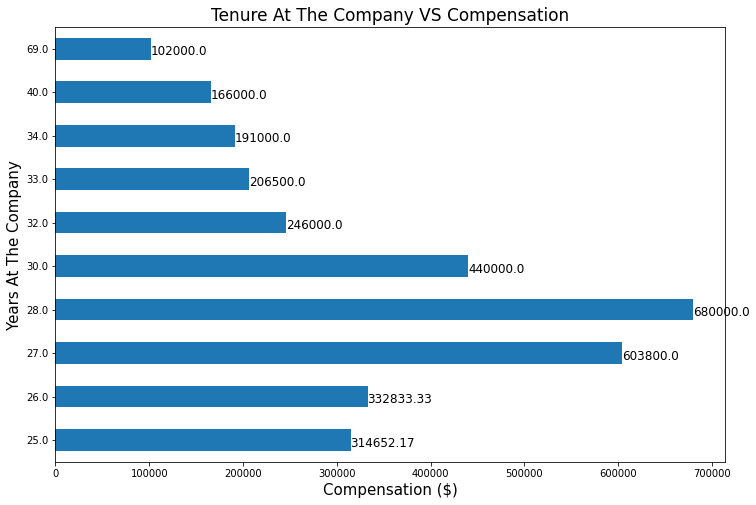

In [326]:
# Let's see if there is a correlation between number of years at the company and compensation

# This shows that there is no correlation between tenure at a company and compensation


years_at_company = df[['totalyearlycompensation','yearsatcompany']].groupby(['yearsatcompany'])\
                                                                                       .mean()\
                                                                                       .round(2)\
                                                                                       .sort_values('yearsatcompany', ascending = False)\
                                                                                       .head(10)\
                                                                                       .sort_values('yearsatcompany', ascending = True)\
                                                                                       .plot.barh(figsize = (12,8), legend = False)
plt.title('Tenure At The Company VS Compensation', size=17)
plt.xlabel('Compensation ($)', size = 15)
plt.ylabel('Years At The Company', size = 15)
for i in years_at_company.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.1, \
            str(round((i.get_width()), 2)), fontsize=12, color='black')
plt.show();

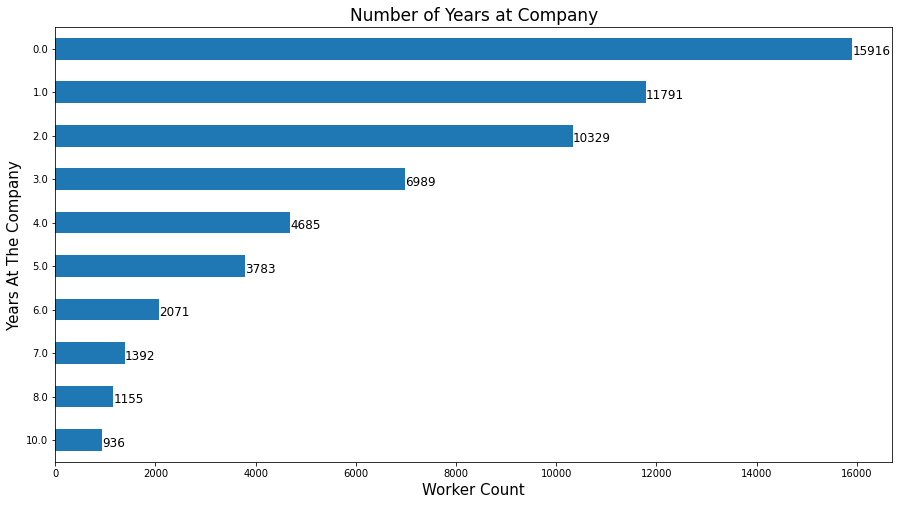

In [327]:
# How long does a typical worker stay at a company? Let's find out

# This shows the fluid nature of the job market. A majority of workers stay with a company between 0 - 2 years.

number_of_years_at_company = df['yearsatcompany'].value_counts(ascending = False)\
                                                            .head(10)\
                                                            .sort_values(ascending = True)\
                                                            .plot.barh(figsize = (15,8));
plt.title('Number of Years at Company', size=17)
plt.xlabel('Worker Count', size = 15)
plt.ylabel('Years At The Company', size = 15)
for i in number_of_years_at_company.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.1, \
            str(round((i.get_width()), 2)), fontsize=12, color='black')
plt.show(); 

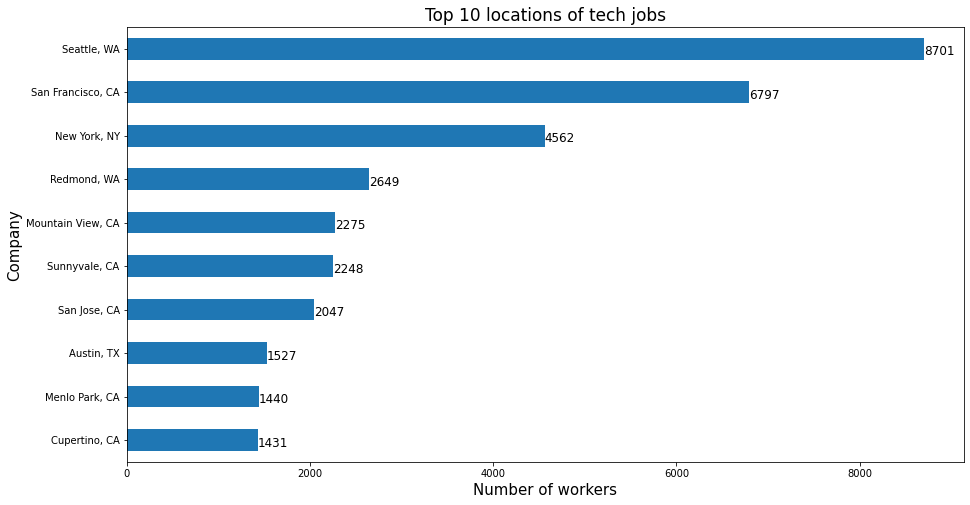

In [328]:
# Let's see the top 10 locations of tech jobs.

location = df['location'].value_counts(ascending = False).head(10).sort_values(ascending = True).plot.barh(figsize = (15,8))
plt.title('Top 10 locations of tech jobs', size=17)
plt.xlabel('Number of workers', size = 15)
plt.ylabel('Company', size = 15)
for i in location.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.1, \
            str(round((i.get_width()), 2)), fontsize=12, color='black')
plt.show();

In [329]:
df.shape

(62642, 29)

In [330]:
# Getting categorical variables
cat_var = df.select_dtypes(include='object').columns
cat_var

Index(['timestamp', 'company', 'level', 'title', 'location', 'tag', 'gender',
       'otherdetails', 'Race', 'Education'],
      dtype='object')

In [331]:
# Getting numerical variables
num_var = df.select_dtypes(exclude='object').columns
num_var

Index(['totalyearlycompensation', 'yearsofexperience', 'yearsatcompany',
       'basesalary', 'stockgrantvalue', 'bonus', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic'],
      dtype='object')

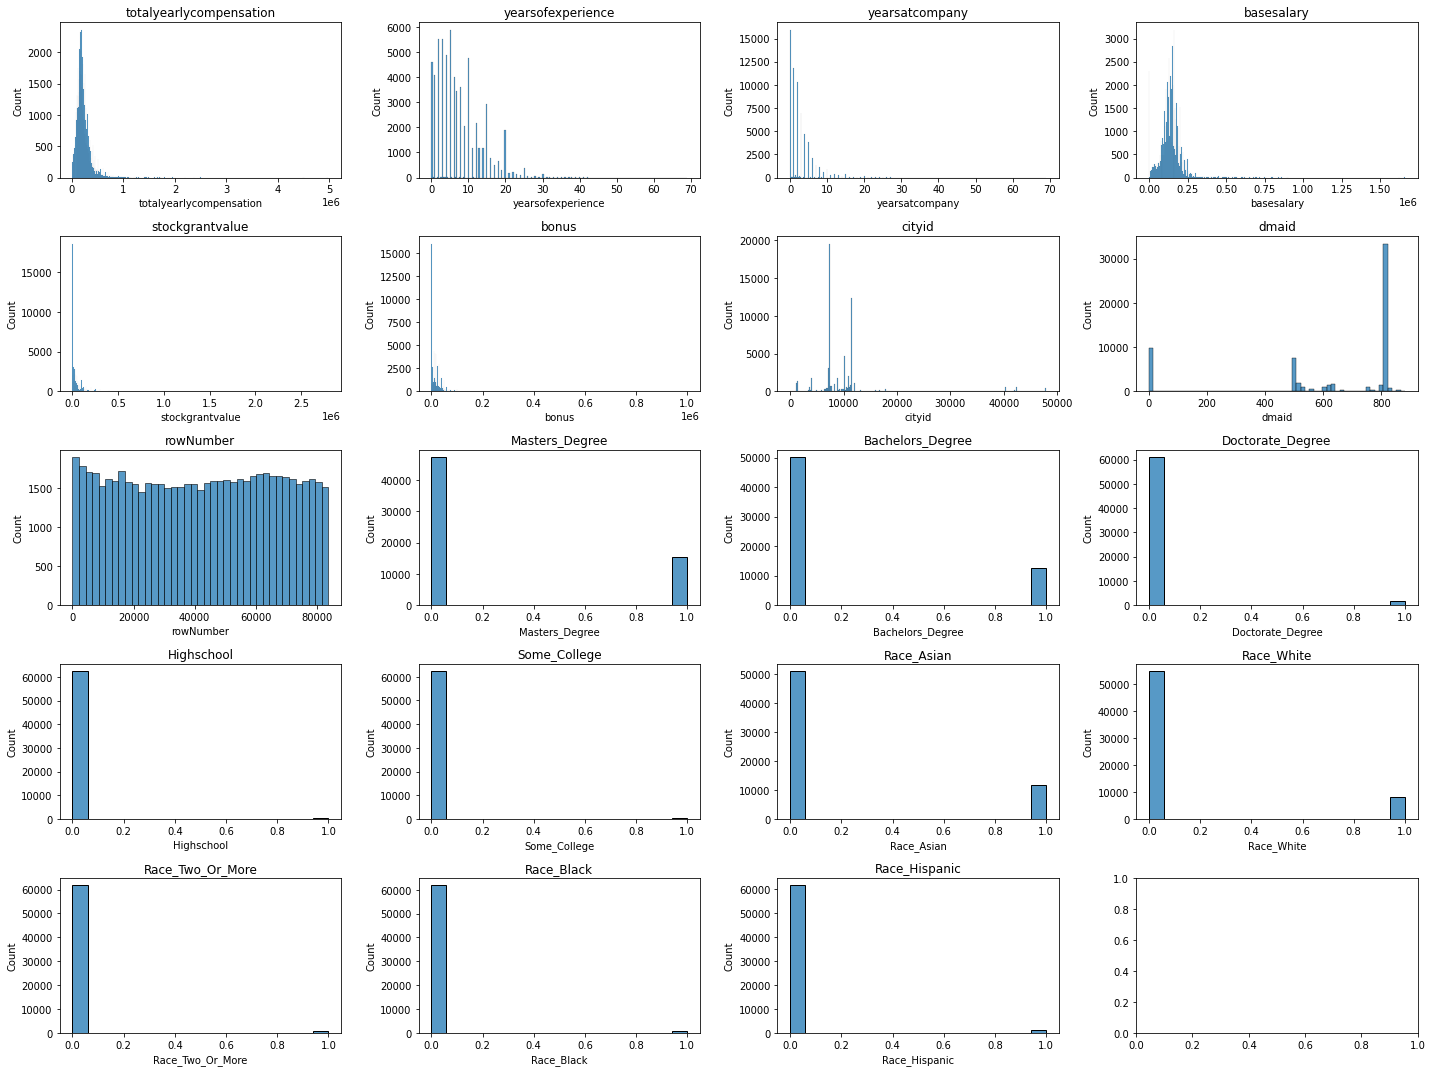

In [332]:
"""
The code generates a grid of subplots where each subplot shows the distribution,
(i.e., histogram) of a variable/column in the df DataFrame.
This type of plot can be useful for exploring the shape and spread of each variable in a dataset.
"""

# Select only the numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Create subplots of histograms for each numerical column
n_rows = 5  # Number of rows in the subplot grid
n_cols = 4  # Number of columns in the subplot grid
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 15))
for i, col in enumerate(num_cols):
    r = i // n_cols
    c = i % n_cols
    ax = axes[r][c]
    sns.histplot(df[col], ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

<AxesSubplot:>

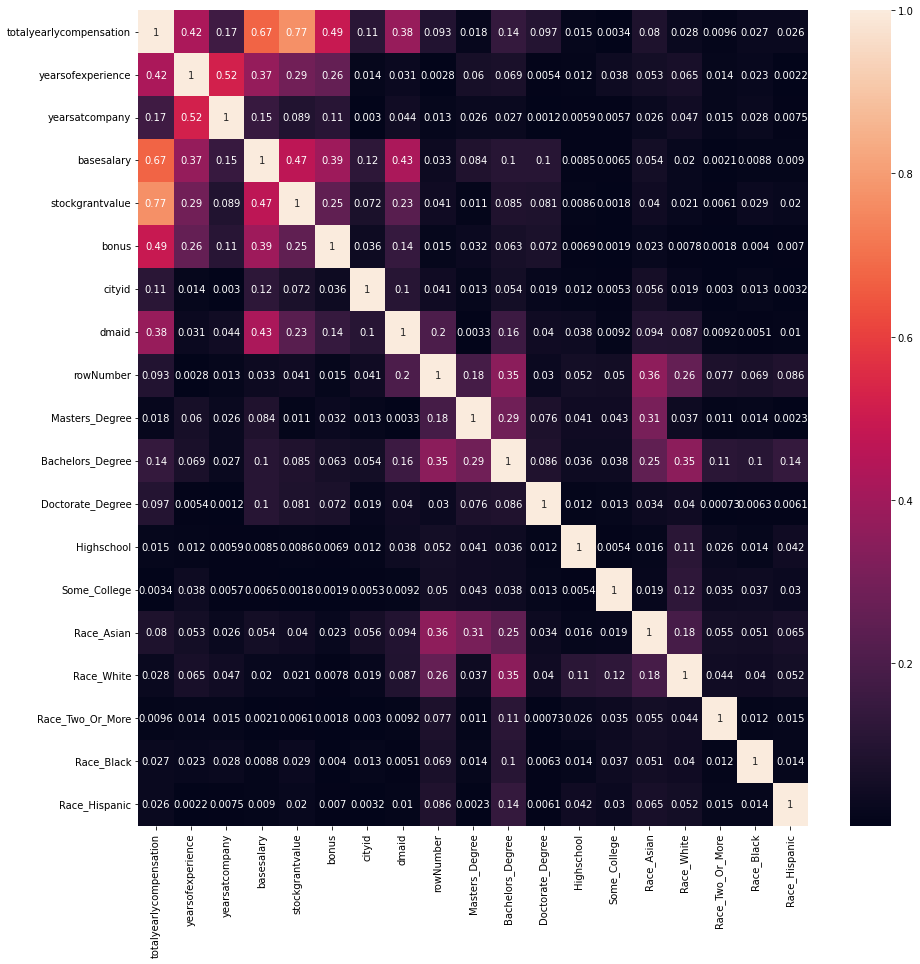

In [333]:
"""
Heatmap function to visualize the correlation matrix of the columns.
It hows the pairwise correlations (i.e., linear relationships) between all pairs of variables/columns in the DataFrame.
"""

plt.figure(figsize=(15, 15))
sns.heatmap(df.corr().abs(),annot=True)

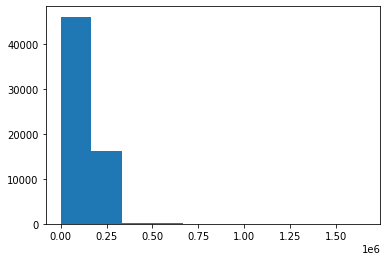

In [334]:
"""
This graps provide a basic summary and visualization of the distribution of the basesalary column.
The x-axis of the histogram will represent the range of basesalary values, divided into several bins, 
and the y-axis will represent the frequency of observations falling into each bin. 
"""

df.describe()
plt.hist(df['basesalary'])
plt.show()

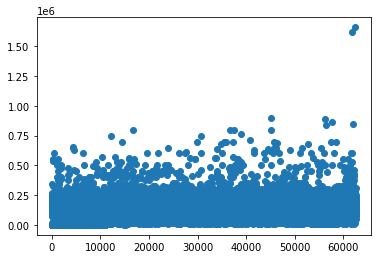

In [335]:
# Scatterplot, with df.index as the values for the x-axis and df['basesalary'] as the values for the y-axis.

plt.scatter(df.index, df['basesalary'])
plt.show()

In [336]:
# Checking the Updated shape of the data

df.shape

(62642, 29)

In [337]:
# Droping the unwanted columns

df.drop(columns='timestamp', inplace=True)
df.drop(columns='Masters_Degree', inplace=True)
df.drop(columns='Bachelors_Degree', inplace=True)
df.drop(columns='Doctorate_Degree', inplace=True)
df.drop(columns='Highschool', inplace=True)
df.drop(columns='Some_College', inplace=True)

In [338]:
df.drop(columns='Race_Asian', inplace=True)
df.drop(columns='Race_White', inplace=True)
df.drop(columns='Race_Two_Or_More', inplace=True)
df.drop(columns='Race_Black', inplace=True)
df.drop(columns='Race_Hispanic', inplace=True)
#df.drop(columns='level', inplace=True)
df.drop(columns='rowNumber', inplace=True)

In [339]:
# Checking the sum of null values of the updated data

df.isnull().sum()

company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
tag                        0
basesalary                 0
stockgrantvalue            0
bonus                      0
gender                     0
otherdetails               0
cityid                     0
dmaid                      0
Race                       0
Education                  0
dtype: int64

In [340]:
# Checking the Updated shape of the data

df.shape

(62642, 17)

In [341]:
# Checking the Updated columns of the data

df.columns

Index(['company', 'level', 'title', 'totalyearlycompensation', 'location',
       'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'Race', 'Education'],
      dtype='object')

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company                  62642 non-null  object 
 1   level                    62642 non-null  object 
 2   title                    62642 non-null  object 
 3   totalyearlycompensation  62642 non-null  int64  
 4   location                 62642 non-null  object 
 5   yearsofexperience        62642 non-null  float64
 6   yearsatcompany           62642 non-null  float64
 7   tag                      62642 non-null  object 
 8   basesalary               62642 non-null  float64
 9   stockgrantvalue          62642 non-null  float64
 10  bonus                    62642 non-null  float64
 11  gender                   62642 non-null  object 
 12  otherdetails             62642 non-null  object 
 13  cityid                   62642 non-null  int64  
 14  dmaid                 

In [343]:

# Select numerical variables with outliers (assuming they are in float data type)
num_vars = df.select_dtypes(include=['float','int']).columns.tolist()

# Replace outliers with the maximum and minimum values of each variable
for col in num_vars:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr
    df[col] = df[col].apply(lambda x: upper_limit if x > upper_limit else x)
    df[col] = df[col].apply(lambda x: lower_limit if x < lower_limit else x)


In [344]:
# Getting categorical variables
cat = df.select_dtypes(include='object').columns
cat

Index(['company', 'level', 'title', 'location', 'tag', 'gender',
       'otherdetails', 'Race', 'Education'],
      dtype='object')

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company                  62642 non-null  object 
 1   level                    62642 non-null  object 
 2   title                    62642 non-null  object 
 3   totalyearlycompensation  62642 non-null  float64
 4   location                 62642 non-null  object 
 5   yearsofexperience        62642 non-null  float64
 6   yearsatcompany           62642 non-null  float64
 7   tag                      62642 non-null  object 
 8   basesalary               62642 non-null  float64
 9   stockgrantvalue          62642 non-null  float64
 10  bonus                    62642 non-null  float64
 11  gender                   62642 non-null  object 
 12  otherdetails             62642 non-null  object 
 13  cityid                   62642 non-null  float64
 14  dmaid                 

In [346]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Select categorical variables (assuming they are in object data type)
cat_vars = df.select_dtypes(include=['object']).columns.tolist()

# Label encode categorical variables
le = LabelEncoder()
for col in cat_vars:
    df[col] = le.fit_transform(df[col])

In [347]:
df.columns

Index(['company', 'level', 'title', 'totalyearlycompensation', 'location',
       'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'Race', 'Education'],
      dtype='object')

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company                  62642 non-null  int64  
 1   level                    62642 non-null  int64  
 2   title                    62642 non-null  int64  
 3   totalyearlycompensation  62642 non-null  float64
 4   location                 62642 non-null  int64  
 5   yearsofexperience        62642 non-null  float64
 6   yearsatcompany           62642 non-null  float64
 7   tag                      62642 non-null  int64  
 8   basesalary               62642 non-null  float64
 9   stockgrantvalue          62642 non-null  float64
 10  bonus                    62642 non-null  float64
 11  gender                   62642 non-null  int64  
 12  otherdetails             62642 non-null  int64  
 13  cityid                   62642 non-null  float64
 14  dmaid                 

In [349]:
# Split the data into features and target

features = df.drop(['basesalary'], axis=1).values
target = df['basesalary'].values.reshape(-1, 1)

In [350]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33,  random_state = 2)

###Comparing the error with SKLearn Lasso Regression

In [351]:
from sklearn.linear_model import Lasso
sk_model = Lasso()

In [352]:
sk_model.fit(X_train, y_train)

Lasso()

In [353]:
sk_train_data_prediction = sk_model.predict(X_train)

In [354]:
test_data_prediction = sk_model.predict(X_test)

In [355]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# R squared error
score_1_ = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2_ = metrics.mean_absolute_error(y_test, test_data_prediction)


print("R squared error : ", score_1_)
print('Mean Absolute Error : ', score_2_)

R squared error :  0.6502876826830799
Mean Absolute Error :  20859.203488345433


#LASSO REGRESSION

In [356]:
# creating a class for Lasso Regression

class Lasso_Regression():

    def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lambda_parameter = lambda_parameter
    
    def set_params(self, **kwargs):
        for key, value in kwargs.items():
            setattr(self, key, value)
        return self

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.y = y

        for i in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self):
        Y_prediction = self.predict(self.X)

        dw = np.zeros(self.n)
        for i in range(self.n):
            if self.w[i] > 0:
                dw[i] = (-(2 * (self.X[:, i]).dot(self.y - Y_prediction)) + self.lambda_parameter) / self.m
            else:
                dw[i] = (-(2 * (self.X[:, i]).dot(self.y - Y_prediction)) - self.lambda_parameter) / self.m

        db = - 2 * np.sum(self.y - Y_prediction) / self.m

        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db
    
    def predict(self, X):
        return X.dot(self.w) + self.b
    
    def score(self, X, y):
        Y_prediction = self.predict(X)
        return 1 - ((y - Y_prediction) ** 2).sum() / ((y - y.mean()) ** 2).sum()


    


  # Predicting the Target variable
    def predict(self,X):
      return np.dot(X, self.w.reshape(-1,1)) + self.b
  
    def mean_squared_error(self,y_true, y_pred):
   
      # Check if the lengths of both arrays are equal
        if len(y_true) != len(y_pred):
            raise ValueError("Length of y_true and y_pred should be the same.")
      
      # Calculate the squared differences between the true and predicted values
        squared_differences = [(y_true[i] - y_pred[i])**2 for i in range(len(y_true))]
      
      # Calculate the mean of the squared differences
        mse1 = sum(squared_differences) / len(squared_differences)
      
        return mse1
    def r2(self,y_true, y_pred):
    # Calculate the mean of the true values
      y_true_mean = sum(y_true) / len(y_true)
    
    # Calculate the total sum of squares (TSS)
      tss = sum((y_true - y_true_mean) ** 2)
    
    # Calculate the residual sum of squares (RSS)
      rss = sum((y_true - y_pred) ** 2)
    
    # Calculate the R-squared value
      r2_score = 1 - (rss / tss)
    
      return r2_score



In [357]:
def mean_squared_error1(self,y_true, y_pred):
   
      # Check if the lengths of both arrays are equal
      if len(y_true) != len(y_pred):
          raise ValueError("Length of y_true and y_pred should be the same.")
      
      # Calculate the squared differences between the true and predicted values
      squared_differences = [(y_true[i] - y_pred[i])**2 for i in range(len(y_true))]
      
      # Calculate the mean of the squared differences
      mse1 = sum(squared_differences) / len(squared_differences)
      
      return mse1

This  creates a new class called Lasso_Regression.

Next is the constructor method for the class. It initializes the hyperparameters of the Lasso Regression model, which are the learning rate, the number of iterations, and the lambda parameter.

Next is the fit method that fits the training dataset to the Lasso Regression model. It initializes the weights and the bias term to zero, then sets the input feature matrix X and target vector Y. It then updates the weights and bias term by calling the "upadte_weights" method in each iteration of the gradient descent algorithm.

Next method updates the weights and bias term according to the gradients of the cost function. It calculates the predicted values of the target variable Y using the current weights and bias term. Then, it computes the gradients of the cost function with respect to the weights and bias term. Finally, it updates the weights and bias term using the learning rate and the gradients.

Next method predicts the target variable Y given an input feature matrix X. It computes the dot product of the input feature matrix X and the weight vector w, then adds the bias term b.

In [358]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [359]:
model = Lasso_Regression(learning_rate= 0.1, no_of_iterations= 200, lambda_parameter= 0.01)

In [360]:
model.fit(X_train, y_train)

In [361]:
test_data_prediction = model.predict(X_test)

In [362]:
from sklearn import metrics

# R squared error
score_1 = model.r2(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = model.mean_squared_error(y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Squared Error : ', score_2)

R squared error :  [0.65026274]
Mean Squared Error :  [9.98219511e+08]


In [363]:
import random

# define hyperparameters ranges
learning_rate_range = [0.01, 0.001, 0.1 ,1]
no_of_iterations_range = [50, 100, 150, 200]
lambda_parameter_range = [0.01, 0.001, 0.1, 1]

# define number of iterations for random search
n_iter = 100

# define best score and best parameters
best_score = 0
best_params = {}

# perform random search
for i in range(n_iter):
    # randomly select hyperparameters from the ranges
    learning_rate = random.choice(learning_rate_range)
    no_of_iterations = random.choice(no_of_iterations_range)
    lambda_parameter = random.choice(lambda_parameter_range)
    
    # create instance of Lasso_Regression model with randomly selected hyperparameters
    lasso = Lasso_Regression(learning_rate=learning_rate, no_of_iterations=no_of_iterations, lambda_parameter=lambda_parameter)

    # fit the model to the training data
    lasso.fit(X_train, y_train)
    
    # calculate the score using the validation data
    score = lasso.score(X_test, y_test)
    
    # check if the current score is better than the best score so far
    if score > best_score:
        best_score = score
        best_params = {'learning_rate': learning_rate, 'no_of_iterations': no_of_iterations, 'lambda_parameter': lambda_parameter}

# print the best parameters and best score
print("Best parameters: ", best_params)
print("Best score: ", best_score)


Best parameters:  {'learning_rate': 0.1, 'no_of_iterations': 200, 'lambda_parameter': 1}
Best score:  0.6502627363343729


Import the random module to generate random values.


Define the ranges of hyperparameters to search over. 


learning_rate_range, no_of_iterations_range, and lambda_parameter_range are lists of values to try for each hyperparameter.


Set the number of iterations to perform during random search to n_iter = 100.

Initialize best_score to 0 and best_params to an empty dictionary.

These variables will be updated during the search to keep track of the best hyperparameters and corresponding score seen so far.


Loop over n_iter iterations.

Within each iteration, randomly select hyperparameters from the defined ranges using random.choice().

Create a new instance of Lasso_Regression model with the randomly selected hyperparameters.

Fit the model to the training data X_train and y_train.

Calculate the score of the model on the validation data X_test and y_test using the score() method of the Lasso_Regression class.

If the current score is better than the best score seen so far, update best_score and best_params.

After all iterations are complete, print the best hyperparameters and corresponding best score.